In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/NIFTY IT-01-07-2022-to-01-07-2023.csv')

In [4]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=347764d71c6fc215420069a79ea1c1f2762e78f30983f0bec5ad58aaf150f85e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [5]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,01-Jul-22,27718.80,28151.00,27524.30,28064.25,17362585,2460.19
1,04-Jul-22,28084.25,28174.40,27643.65,27890.65,16524407,2554.89
2,05-Jul-22,28020.30,28233.05,27642.60,27695.15,22705381,3158.56
3,06-Jul-22,27778.65,28148.90,27628.55,28007.60,19427285,2706.18
4,07-Jul-22,28217.80,28459.25,28077.05,28196.35,17533750,2507.99


#Volatility Indicators
Volatility indicators are tools that help analysts and traders measure the intensity of price fluctuations in a particular stock or the makrte as a whole. When selecting a stock, tradersn may look at its implied volatility or historical volatility to help identify its assiciated risks

In [6]:
import ta

#  Average True Range (ATR):
   - The ATR is calculated as the average of the true range over a specified number of periods (e.g., 14 days).
   - It represents the average volatility of the asset over that period.

##Traders and analysts use ATR to:
      - Determine appropriate stop-loss levels based on the volatility of the asset.
      - Assess the risk associated with entering a trade.
      - Identify potential breakouts or reversals in price trends.
      - Set position size based on risk tolerance and volatility.
      - Develop trading strategies that account for market volatility.

In [9]:
df['AverageTrueRange']=ta.volatility.AverageTrueRange(df.High,
                                                      df.Low,
                                                      df.Close,
                                                      window=14,
                                                      fillna=False).average_true_range()

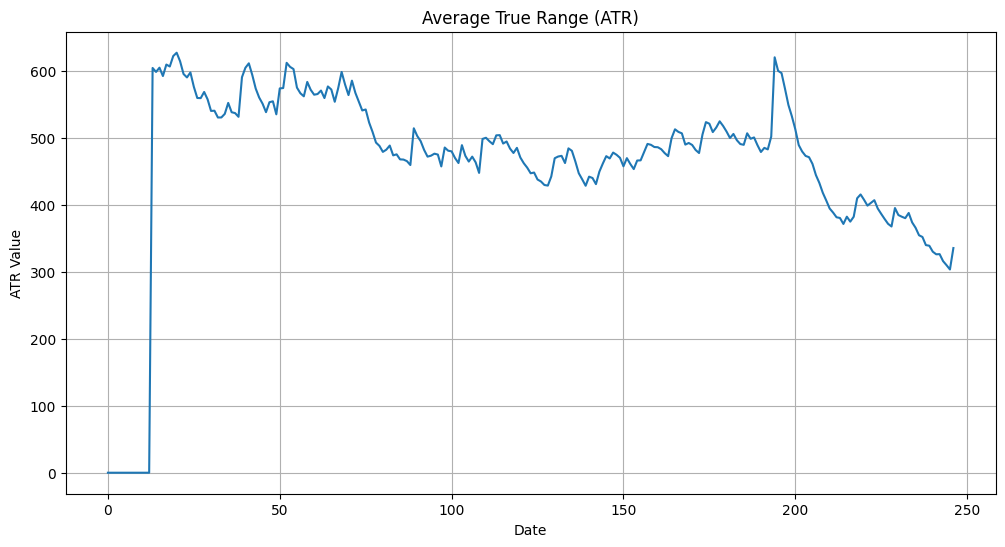

In [10]:
# prompt: Plot the above column

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['AverageTrueRange'])
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('ATR Value')
plt.grid(True)
plt.show()


#Bollinger Bands
A Bollinger Band indicator consists of a middle band with two outer bands. The middle band is a simple moving average usually set at 20 periods. The outer bands are usually set two standard deviations above and below the middle band. The settings can be modified depending on the characteristics of a security or your trading style.  

In [20]:
df['BollingerUpper']=ta.volatility.BollingerBands(df.Close,window=20,window_dev=2).bollinger_hband()
#df['BollingerBands']=ta.volatility.BollingerBands(df.Close,window=20,window_dev=2).bollinger_hband_indicator()
df['BollingerLower']=ta.volatility.BollingerBands(df.Close,window=20,window_dev=2).bollinger_lband()
#df['BollingerBands']=ta.volatility.BollingerBands(df.Close,window=20,window_dev=2).bollinger_lband_indicator()
df['BollingerBands']=ta.volatility.BollingerBands(df.Close,window=20,window_dev=2).bollinger_pband()
#df['BollingerBands']=ta.volatility.BollingerBands(df.Close,window=20,window_dev=2).bollinger_pband_indicator()
#df['BollingerBands']=ta.volatility.BollingerBands(df.Close,window=20,window_dev=2).bollinger_wband()
df['BollingerBandsM']=ta.volatility.BollingerBands(df.Close,window=20,window_dev=2).bollinger_mavg()

In [25]:

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['BollingerUpper'], mode='lines', name='Bollinger Upper Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['BollingerLower'], mode='lines', name='Bollinger Lower Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['BollingerBandsM'], mode='lines', name='Bollinger Middle Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'))


fig.update_layout(title='Bollinger Bands',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()





In [26]:
df['BollingerBands']=ta.volatility.BollingerBands(df.Close,window=20,window_dev=2).bollinger_pband()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['BollingerBands'], mode='lines', name='Bollinger Bands %'))
fig.update_layout(title='Bollinger Bands Percentage',
                  xaxis_title='Date',
                  yaxis_title='Percentage')
fig.show()

Bollinger BandWidth is best known for identifying The Squeeze. This occurs when volatility falls to a low level, as evidenced by the narrowing bands. The upper and lower bands are based on the standard deviation, which measures volatility. The bands narrow as price flattens or moves within a relatively narrow range. The theory is that periods of low volatility are followed by periods of high volatility. Relatively narrow BandWidth (a.k.a. the Squeeze) can foreshadow a significant advance or decline. After a Squeeze, a price surge and subsequent band break signal the start of a new move. A new advance starts with a Squeeze and subsequent break above the upper band. A new decline starts with a Squeeze and subsequent break below the lower band.

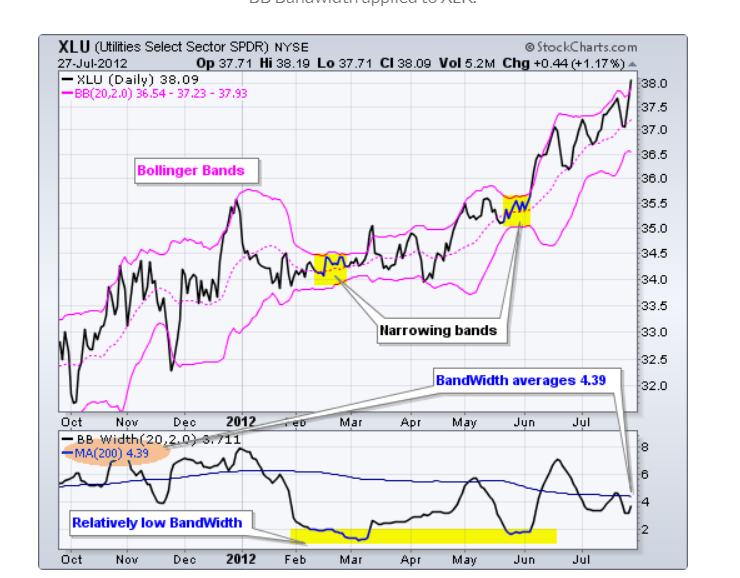

#Donchian Channel
Donchian channels are a tool in technical analysis used to determine the relative volatility of a market and the potential for price breakouts. To form it, three lines are generated from moving average calculations that produce a filled-in channel formed by upper and lower bands around a midrange band. The upper band marks the highest price of a security over a period, while the lower band marks the lowest price of a security over that time. The area between the upper and lower bands is called the Donchian channel. While relatively simple, it's quite helpful in highlighting trends and can suggest the right time to enter or exit a position.

Key Takeaways:

Donchian Channels are a technical indicator that seeks to identify bullish and bearish extremes that favor reversals, higher and lower breakouts, breakdowns, and other emerging trends.

The middle band computes the average between the highest high over a given period and the lowest low over the same time. These points identify the median or mean reversion price.

Combining moving averages, volume indicators, and moving average convergence divergence (MACD) with Donchian channels can lead to a more complete picture of the market for an asset.

The channels are popular for their simplicity and effectiveness, particularly for following trends and using momentum strategies. They can be applied to many markets, including stocks, commodities, and forex.


In [28]:
df['DonchianChannelH']=ta.volatility.DonchianChannel(df['High'],df['Low'],df['Close']).donchian_channel_hband()
df['DonchianChannelL']=ta.volatility.DonchianChannel(df['High'],df['Low'],df['Close']).donchian_channel_lband()
df['DonchianChannelM']=ta.volatility.DonchianChannel(df['High'],df['Low'],df['Close']).donchian_channel_mband()

In [29]:

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.add_trace(go.Scatter(x=df.index, y=df['DonchianChannelH'], mode='lines', name='DonchianChannelH', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df.index, y=df['DonchianChannelL'], mode='lines', name='DonchianChannelL', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df.index, y=df['DonchianChannelM'], mode='lines', name='DonchianChannelM', line=dict(color='green')))


fig.update_layout(
    title='Donchian Channel',
    yaxis_title='Price'
)

fig.show()


#Kelter Channel

Middle Line: 20-day exponential moving average

Upper Channel Line: 20-day EMA + (2 x ATR(10))

Lower Channel Line: 20-day EMA - (2 x ATR(10))

A channel upturn and break above the upper trend line can signal the start of an uptrend. A channel downturn and break below the lower trend line can signal the start a downtrend. Sometimes a strong trend does not take hold after a channel breakout and prices oscillate between the channel lines. Such trading ranges are marked by a relatively flat moving average. The channel boundaries can then be used to identify overbought and oversold levels for trading purposes.

In [40]:
df['KelterChannelH']=ta.volatility.KeltnerChannel(df['High'],df['Low'],df['Close'],
                                                  window=20,
                                                  window_atr=10,
                                                  fillna=False,
                                                  original_version=True,
                                                  multiplier=3).keltner_channel_hband()
df['KelterChannelL']=ta.volatility.KeltnerChannel(df['High'],
                                                df['Low'],
                                                  df['Close'],
                                                  window=20,window_atr=10,
                                                  fillna=False,
                                                  original_version=True,
                                                  multiplier=3).keltner_channel_lband()
df['KelterChannelM']=ta.volatility.KeltnerChannel(df['High'],df['Low'],df['Close'],
                                                  window=20,window_atr=10,
                                                  original_version=True,
                                                  fillna=False,multiplier=3).keltner_channel_mband()

In [41]:
fig=go.Figure(data=[go.Candlestick(x=df.index,
                                  open=df['Open'],
                                  high=df['High'],
                                  low=df['Low'],
                                  close=df['Close'],

                                  )])

In [42]:
fig.add_trace(go.Scatter(x=df.index,y=df['KelterChannelH'],mode='lines',name='KelterChannelH',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df.index,y=df['KelterChannelL'],mode='lines',name='KelterChannelL',line=dict(color="red")))
fig.add_trace(go.Scatter(x=df.index,y=df['KelterChannelM'],mode='lines',name='KelterChannelM',line=dict(color='green')))

fig.update_layout(
    title='KelterChannel',
    yaxis_title='Price'
)

fig.show()


#Ulcer Index
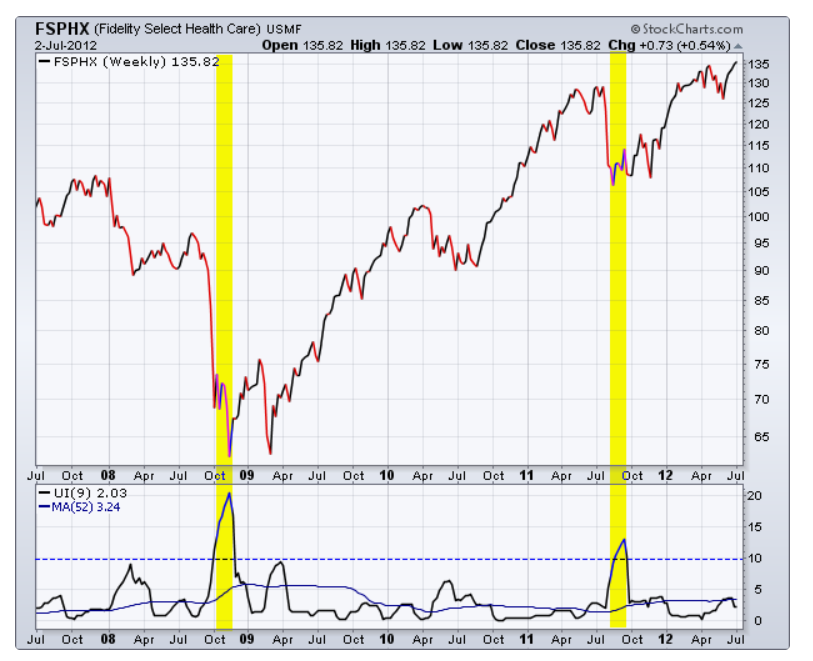

Ulcer Index rises as prices falls
and falls as prices rises

In [43]:
df['UlcerIndex']=ta.volatility.UlcerIndex(df['Close'],window=14,fillna=False).ulcer_index()


In [52]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add the closing price trace to the first subplot
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'), row=1, col=1)
fig.update_yaxes(title_text="Close Price", row=1, col=1)

# Add the Ulcer Index trace to the second subplot
fig.add_trace(go.Scatter(x=df.index, y=df['UlcerIndex'], mode='lines', name='Ulcer Index'), row=2, col=1)
fig.update_yaxes(title_text="Ulcer Index", row=2, col=1)

fig.update_layout(
    title="Close Price and Ulcer Index",
    xaxis_title="Date"
)

fig.show()
